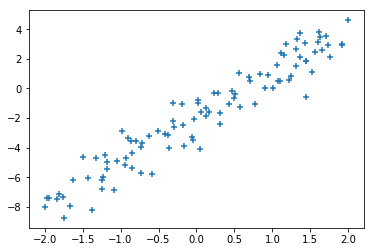

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100, 1) # 做出100个0-1的随机数
x = x * 4 - 2 # 值的范围变为-2-2

y = 3 * x - 2
y += np.random.randn(100,1) # 加上标准正态分布 (均值为0、标准差1) 的随机数

plt.scatter(x, y, marker='+')
plt.show()

In [35]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x, y)

print(model.coef_)
print(model.intercept_)

r2 = model.score(x, y)
print(r2)

[[2.94009986]]
[-1.99904335]
0.9207599835479194


In [36]:
y = 3 * x**2 - 2

y += np.random.randn(100, 1)

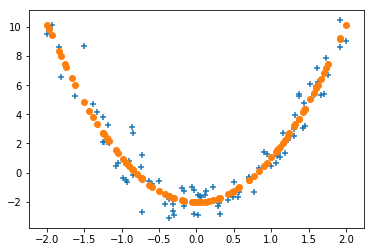

[[3.05844745]]
[-2.03425006]
0.9308074525819774


In [37]:
model.fit(x**2, y)

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x**2), marker='o')

plt.show()

print(model.coef_)
print(model.intercept_)

print(model.score(x**2, y))

## 多元回归

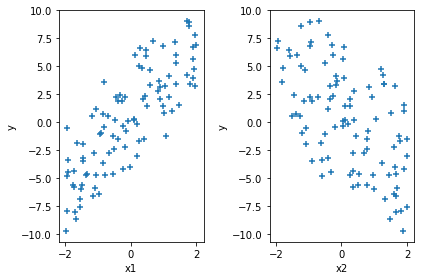

In [38]:
x1 = np.random.rand(100, 1)
x1 = x1 * 4 -2

x2 = np.random.rand(100, 1)
x2 = x2 * 4 -2

y = 3 * x1 - 2 * x2 + 1

y += np.random.randn(100, 1)

plt.subplot(1, 2, 1)
plt.scatter(x1, y, marker='+')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(x2, y, marker='+')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

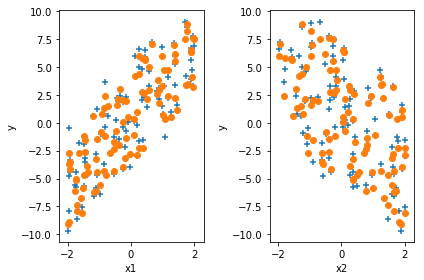

In [39]:
x1_x2 = np.c_[x1, x2]

model = linear_model.LinearRegression()
model.fit(x1_x2, y)

y_ = model.predict(x1_x2) # 用求出的回归式进行预测

plt.subplot(1, 2, 1)
plt.scatter(x1, y, marker='+')
plt.scatter(x1, y_, marker='o')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(x2, y, marker='+')
plt.scatter(x2, y_, marker='o')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [40]:
print(model.coef_)
print(model.intercept_)
print(model.score(x1_x2, y))

[[ 3.00731231 -2.1642479 ]]
[0.88112506]
0.9630512407023141


## 过拟合

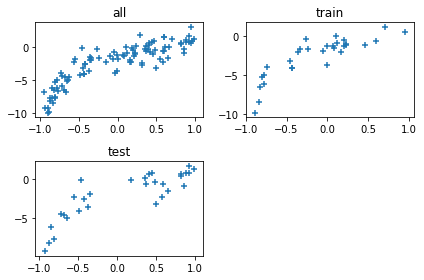

In [41]:
x = np.random.rand(100, 1)
x = x * 2 - 1

y = 4 * x**3 - 3 * x**2 + 2 * x -1
y += np.random.randn(100, 1)

# 学习数据30个
x_train = x[:30]
y_train = y[:30]

# 测试数据70个
x_test = x[70:]
y_test = y[70:]

plt.subplot(2, 2, 1)
plt.scatter(x, y, marker='+')
plt.title('all')

plt.subplot(2, 2, 2)
plt.scatter(x_train, y_train, marker='+')
plt.title('train')

plt.subplot(2, 2, 3)
plt.scatter(x_test, y_test, marker='+')
plt.title('test')

plt.tight_layout()
plt.show()

[[-377.54463323 -260.551064    662.69265366  379.84447836 -361.71428701
  -156.20926765   74.79388712   15.9656507    -1.99130373]]
[-1.54902719]
0.9170316590439433


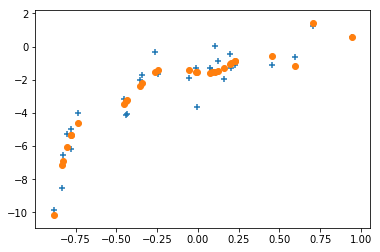

In [42]:
X_TRAIN = np.c_[x_train**9, x_train**8, x_train**7,
                x_train**6, x_train**5, x_train**4,
                x_train**3, x_train**2, x_train]
model = linear_model.LinearRegression()
model.fit(X_TRAIN, y_train)

print(model.coef_)
print(model.intercept_)
print(model.score(X_TRAIN, y_train))

plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, model.predict(X_TRAIN))
plt.show()

-1.9581788088302248


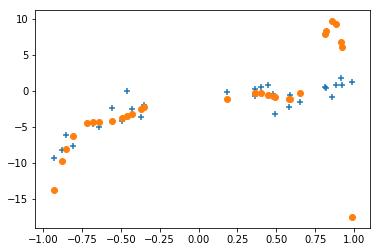

In [43]:
X_TEST = np.c_[x_test**9, x_test**8, x_test**7,
               x_test**6, x_test**5, x_test**4,
               x_test**3, x_test**2, x_test]

print(model.score(X_TEST, y_test))

plt.scatter(x_test, y_test, marker='+')
plt.scatter(x_test, model.predict(X_TEST))
plt.show()

[[ 0.69093523 -0.82261376  0.90065094 -0.93858201  1.18092566 -1.02433819
   1.58053898 -1.02730906  2.0820861 ]]
[-1.54078615]
0.8618516950205546


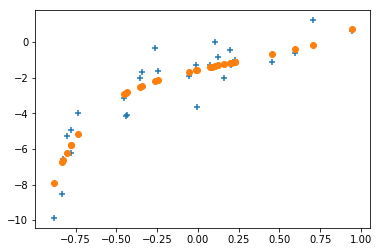

In [44]:
model = linear_model.Ridge()
model.fit(X_TRAIN, y_train)

print(model.coef_)
print(model.intercept_)
print(model.score(X_TRAIN, y_train))

plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, model.predict(X_TRAIN))
plt.show()

0.854423340293443


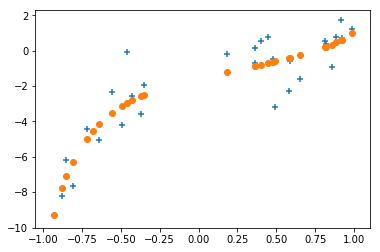

In [45]:
print(model.score(X_TEST, y_test))

plt.scatter(x_test, y_test, marker='+')
plt.scatter(x_test, model.predict(X_TEST))
plt.show()

## 各种各样的回归模型

In [46]:
import math

x = np.random.rand(1000, 1)
x = x * 20 - 10

y = np.array([math.sin(v) for v in x])
y += np.random.randn(1000)

0.009911686701519429


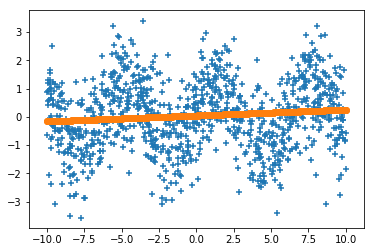

In [47]:
model = linear_model.LinearRegression()
model.fit(x, y)

print(model.score(x, y))

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()

0.11979544866291136


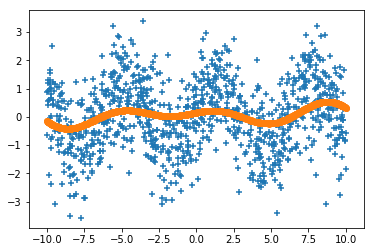

In [51]:
from sklearn import svm

model = svm.SVR()
model.fit(x, y)

print(model.score(x, y))

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()

0.8594672518427736


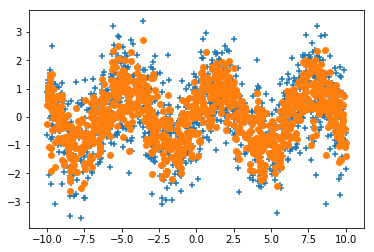

In [52]:
from sklearn import ensemble

model = ensemble.RandomForestRegressor()
model.fit(x, y)

print(model.score(x, y))

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()

0.44635064870577934


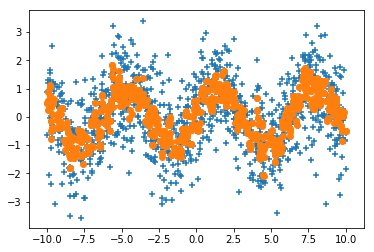

In [53]:
from sklearn import neighbors

model = neighbors.KNeighborsRegressor()
model.fit(x, y)

print(model.score(x, y))

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()